In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('GOOG.csv')
df.head()


,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


In [4]:
df=df[['date', 'open', 'close']] # extracted required columns
df['date']=pd.to_datetime(df['date'].apply(lambda x: x.split()[0])) # selected date column only
df.set_index('date', drop=True, inplace=True) # set date column as index
df.head()

,open,close
date,,
2016-06-14,716.48,718.27
2016-06-15,719.00,718.92
2016-06-16,714.91,710.36
2016-06-17,708.65,691.72
2016-06-20,698.77,693.71


C:\Users\HP\AppData\Local\Temp\ipykernel_12724\3117937662.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fg.show()


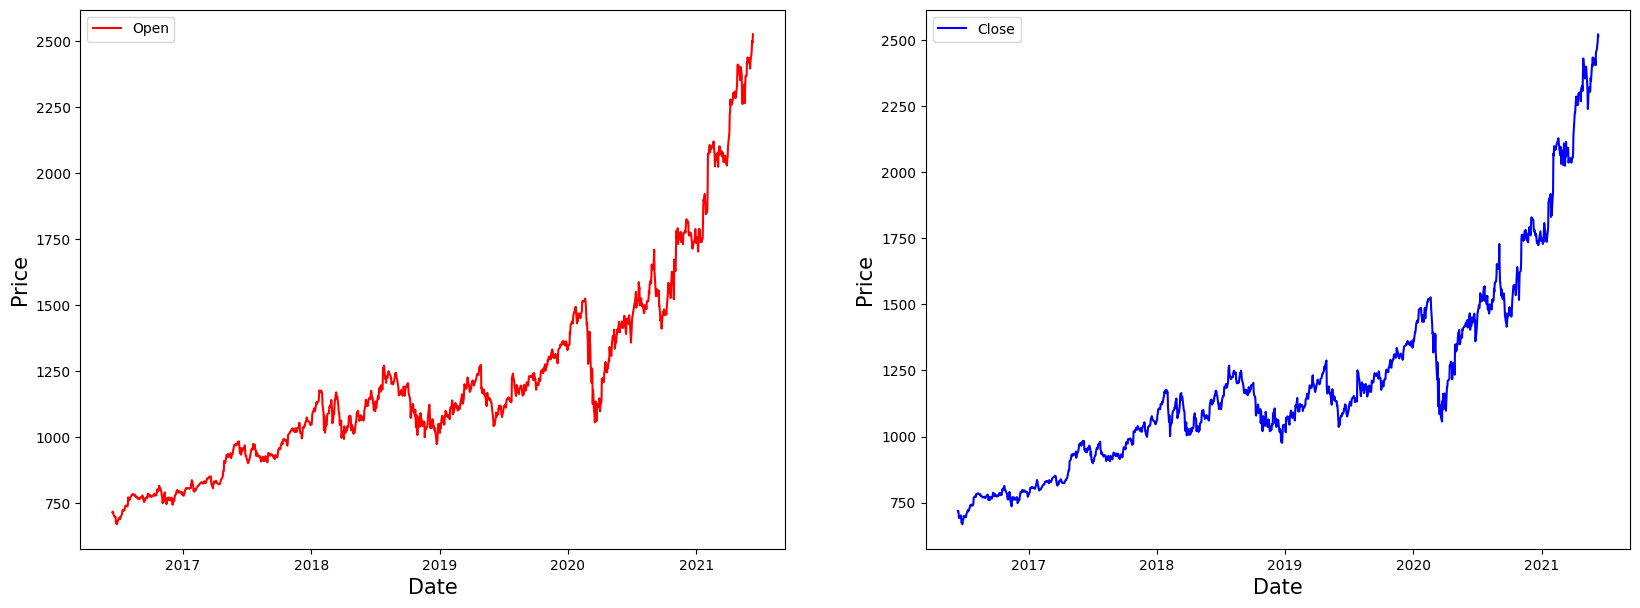

In [5]:
fg, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(df['open'],label='Open',color='red')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(df['close'],label='Close',color='blue')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

fg.show()

In [6]:
from sklearn.preprocessing import MinMaxScaler
MMS=MinMaxScaler()
df[df.columns]=MMS.fit_transform(df)

In [7]:
df.shape

(1258, 2)

In [8]:
training_size=round(len(df)*0.80) # selected 75% training & 25% for testing
training_size

1006

In [9]:
train_data=df[:training_size]
test_data=df[training_size:]
train_data.shape, test_data.shape

((1006, 2), (252, 2))

In [10]:
# Function to create sequence of data for training and testing

def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): # Selecting 50 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [11]:
 train_seq, train_label=create_sequence(train_data)
test_seq, test_label=create_sequence(test_data)

In [12]:
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((956, 50, 2), (956, 2), (202, 50, 2), (202, 2))

In [13]:
# creating a LSTM(long short term memory) Model

from keras.models import Sequential
from keras.layers import Dense, Dropout , LSTM, Bidirectional

In [14]:
model=Sequential()
model.add(LSTM(units=51, return_sequences=True, input_shape=(train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1))
model.add(LSTM(units=50))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 51)            11016     
                                                                 
 dropout (Dropout)           (None, 50, 51)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20400     
                                                                 
 dense (Dense)               (None, 2)                 102       
                                                                 
Total params: 31518 (123.12 KB)
Trainable params: 31518 (123.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
model.fit(train_seq, train_label, epochs=81, validation_data=(test_seq, test_label), verbose=1)

Epoch 1/81
30/30 [==============================] - 8s 99ms/step - loss: 0.0090 - mean_absolute_error: 0.0678 - val_loss: 0.0183 - val_mean_absolute_error: 0.1162
Epoch 2/81
30/30 [==============================] - 1s 48ms/step - loss: 0.0011 - mean_absolute_error: 0.0260 - val_loss: 0.0046 - val_mean_absolute_error: 0.0548
Epoch 3/81
30/30 [==============================] - 1s 38ms/step - loss: 5.9321e-04 - mean_absolute_error: 0.0170 - val_loss: 0.0021 - val_mean_absolute_error: 0.0369
Epoch 4/81
30/30 [==============================] - 1s 39ms/step - loss: 5.6063e-04 - mean_absolute_error: 0.0169 - val_loss: 0.0016 - val_mean_absolute_error: 0.0339
Epoch 5/81
30/30 [==============================] - 1s 40ms/step - loss: 5.5680e-04 - mean_absolute_error: 0.0171 - val_loss: 0.0027 - val_mean_absolute_error: 0.0413
Epoch 6/81
30/30 [==============================] - 1s 39ms/step - loss: 5.1961e-04 - mean_absolute_error: 0.0165 - val_loss: 0.0016 - val_mean_absolute_error: 0.0324
Epoch 

In [25]:
test_predicted=model.predict(test_seq)
test_predicted[:5]

7/7 [==============================] - 0s 11ms/step


array([[0.4652946 , 0.46968392],
       [0.47232547, 0.4770613 ],
       [0.4777565 , 0.48287115],
       [0.49112353, 0.49609876],
       [0.5022232 , 0.5074497 ]], dtype=float32)

In [23]:
test_inverse_predicted = MMS.inverse_transform(test_predicted) # Inversing scaling on predicted data
test_inverse_predicted[:5]

array([[1533.619 , 1538.744 ],
       [1546.6536, 1552.4167],
       [1556.7223, 1563.1844],
       [1581.5037, 1587.6997],
       [1602.0817, 1608.7368]], dtype=float32)

In [27]:
# Merging actual and predicted data for better visualization

gs_slic_data = pd.concat([df.iloc[-202:].copy(),pd.DataFrame(test_inverse_predicted,columns=['open_predicted','close_predicted'],index=df.iloc[-202:].index)], axis=1)

In [28]:
gs_slic_data[['open','close']] = MMS.inverse_transform(gs_slic_data[['open','close']]) # Inverse scaling

In [29]:
gs_slic_data.head()

,open,close,open_predicted,close_predicted
date,,,,
2020-08-24,1593.98,1588.20,1533.619019,1538.744019
2020-08-25,1582.07,1608.22,1546.653564,1552.416748
2020-08-26,1608.00,1652.38,1556.722290,1563.184448
2020-08-27,1653.68,1634.33,1581.503662,1587.699707
2020-08-28,1633.49,1644.41,1602.081665,1608.736816


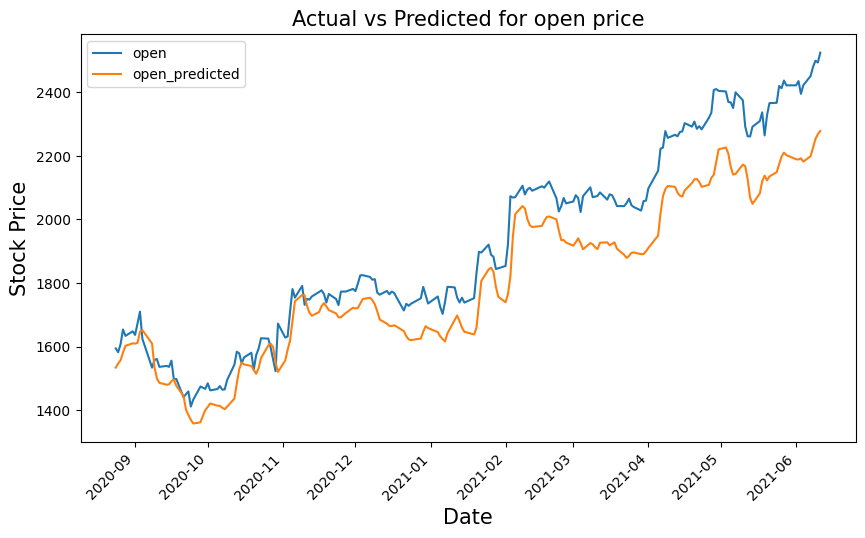

In [30]:
gs_slic_data[['open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

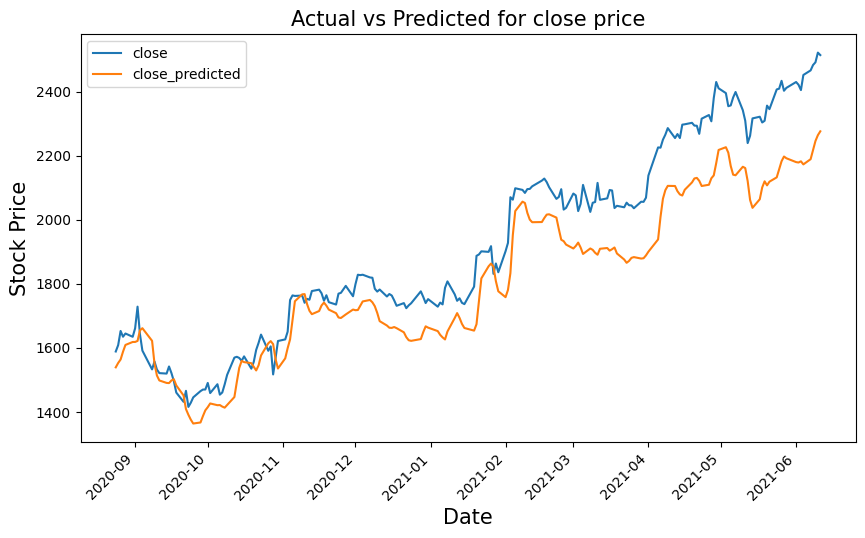

In [35]:
gs_slic_data[['close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()

In [ ]:
# Creating a dataframe and adding 10 days to existing index 

gs_slic_data = gs_slic_data.add(pd.DataFrame(columns=gs_slic_data.columns,index=pd.date_range(start=gs_slic_data.index[-1], periods=11, freq='D', closed='right')))

In [38]:
gs_slic_data['2021-06-09	':'2021-06-16']

,open,close,open_predicted,close_predicted
date,,,,
2021-06-09,2499.50,2491.40,2253.256348,2245.631592
2021-06-10,2494.01,2521.60,2268.520020,2263.785889
2021-06-11,2524.92,2513.93,2278.166260,2275.892822


In [39]:
upcoming_prediction = pd.DataFrame(columns=['open','close'],index=gs_slic_data.index)
upcoming_prediction.index=pd.to_datetime(upcoming_prediction.index)

In [40]:
curr_seq = test_seq[-1:]

for i in range(-10,0):
  up_pred = model.predict(curr_seq)
  upcoming_prediction.iloc[i] = up_pred
  curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
  curr_seq = curr_seq.reshape(test_seq[-1:].shape)

1/1 [==============================] - 0s 41ms/step


In [41]:
upcoming_prediction[['open','close']] = MMS.inverse_transform(upcoming_prediction[['open','close']])

C:\Users\HP\AppData\Local\Temp\ipykernel_12724\4155468105.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fg.show()


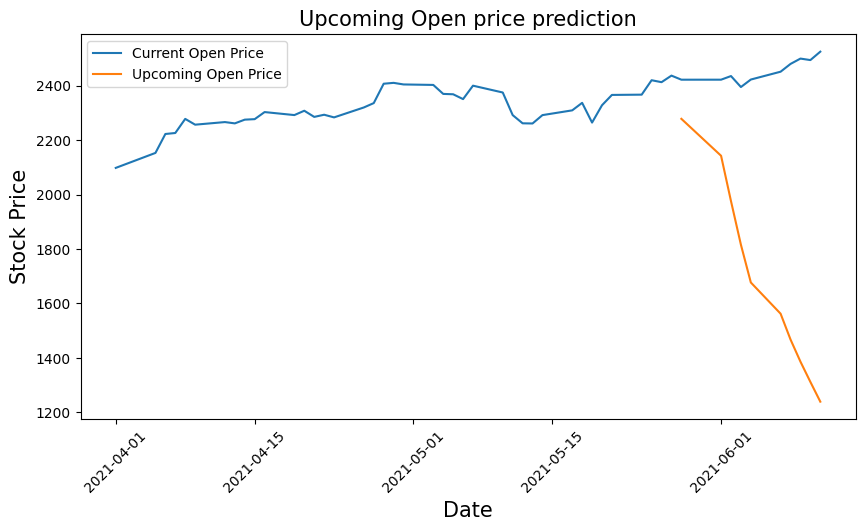

In [42]:
fg,ax=plt.subplots(figsize=(10,5))
ax.plot(gs_slic_data.loc['2021-04-01':,'open'],label='Current Open Price')
ax.plot(upcoming_prediction.loc['2021-04-01':,'open'],label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming Open price prediction',size=15)
ax.legend()
fg.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_12724\548185773.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fg.show()


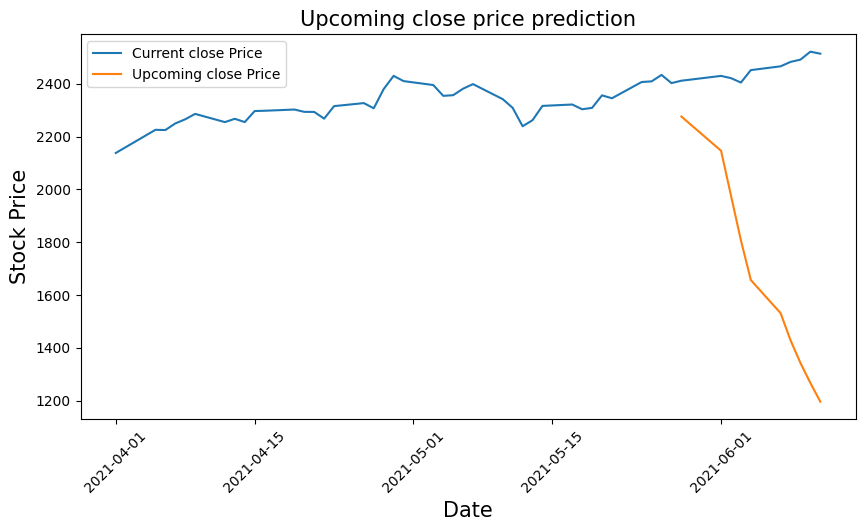

In [43]:
fg,ax=plt.subplots(figsize=(10,5))
ax.plot(gs_slic_data.loc['2021-04-01':,'close'],label='Current close Price')
ax.plot(upcoming_prediction.loc['2021-04-01':,'close'],label='Upcoming close Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming close price prediction',size=15)
ax.legend()
fg.show()